In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import wavesim_functions as wave 

In [34]:
np.random.seed(1234)

In [35]:
hs = 10
tp = 12
depth = 100
cond = False
a = 0

In [36]:
num_sea_states = 2000
sea_state_hours = 1
period = 60**2 * sea_state_hours  # total time range in seconds
waves_per_state = 60**2/tp

In [37]:
z_num = 150
z_range = np.linspace(-depth, 50, z_num)
z = z_range[1] - z_range[0]

In [38]:

freq = 1.00  # number of sample points per second

nT = np.floor(period*freq)  # number of time points to evaluate
t_num = int(nT)  # to work with rest of the code

dt = 1/freq  # time step is determined by frequency
t_range = np.linspace(-nT/2, nT/2 - 1, int(nT)) * dt  # centering time around 0

f_range = np.linspace(1e-3, nT - 1, int(nT)) / (nT / freq)  # selecting frequency range from 0 to freq
om_range = f_range * (2*np.pi)

In [39]:
# get crest cdf
CoH = np.linspace(1e-3, 1.5)
crest_cdf = wave.rayleigh_cdf(CoH * hs, hs)

In [40]:
# get jonswap densities
jnswp_dens = wave.djonswap(f_range, hs, tp)

In [41]:
# max_crests = np.ndarray(num_sea_states)
# for i in range(num_sea_states):
#     eta_fft, u_x_fft, u_z_fft, du_x_fft, du_z_fft = wave.fft_random_wave_sim(z_range, depth, a, om_range, jnswp_dens, cond)
#     max_crests[i] = np.max(eta_fft[0])
#     print(i)
    
# np.savetxt('max_crests.txt', max_crests, delimiter=',') 

In [42]:
max_crests = np.loadtxt('max_crests.txt')
max_crests

array([9.8243031, 9.8243031, 9.8243031, 9.8243031, 9.8243031, 9.8243031,
       9.8243031, 9.8243031, 9.8243031, 9.8243031, 9.8243031, 9.8243031,
       9.8243031, 9.8243031, 9.8243031, 9.8243031, 9.8243031, 9.8243031,
       9.8243031, 9.8243031, 9.8243031, 9.8243031, 9.8243031, 9.8243031,
       9.8243031, 9.8243031, 9.8243031, 9.8243031, 9.8243031, 9.8243031,
       9.8243031, 9.8243031, 9.8243031, 9.8243031, 9.8243031, 9.8243031,
       9.8243031, 9.8243031, 9.8243031, 9.8243031, 9.8243031, 9.8243031,
       9.8243031, 9.8243031, 9.8243031, 9.8243031, 9.8243031, 9.8243031,
       9.8243031, 9.8243031, 9.8243031, 9.8243031, 9.8243031, 9.8243031,
       9.8243031, 9.8243031, 9.8243031, 9.8243031, 9.8243031, 9.8243031,
       9.8243031, 9.8243031, 9.8243031, 9.8243031, 9.8243031, 9.8243031,
       9.8243031, 9.8243031, 9.8243031, 9.8243031, 9.8243031, 9.8243031,
       9.8243031, 9.8243031, 9.8243031, 9.8243031, 9.8243031, 9.8243031,
       9.8243031, 9.8243031, 9.8243031, 9.8243031, 

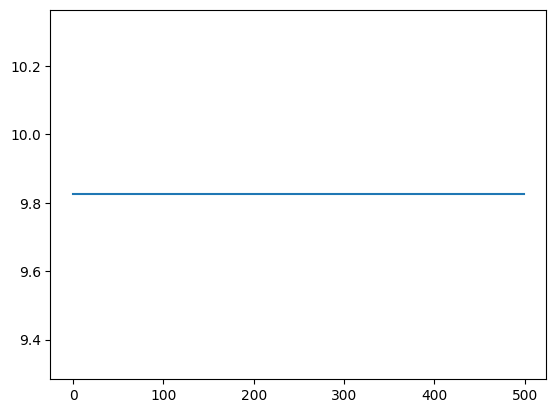

In [43]:
plt.figure()
plt.plot(max_crests)
plt.show()

In [44]:
emp = np.ndarray(len(CoH))
for i_c, c in enumerate(CoH):
    emp[i_c] = sum(c*hs > max_crests)/num_sea_states

In [45]:
true = crest_cdf**waves_per_state

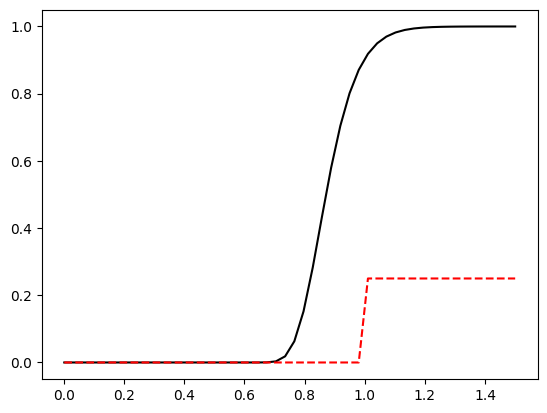

In [46]:
plt.figure()
plt.plot(CoH, true, '-k')
plt.plot(CoH, emp, '--r')
plt.show()

In [47]:
nSim = 1000
g_l = np.min(CoH)
g_u = np.max(CoH)
CoH_unif = np.random.uniform(low=g_l, high=g_u, size=nSim)

In [48]:
C_unif = CoH_unif * hs
k = waves_per_state 

f_0 = wave.rayleigh_pdf(C_unif * hs, hs)
f_prime = np.exp(-8*C_unif**2/hs**2) * (16/hs**2 - (16*C_unif/hs**2)**2)
f = C_unif/(1.5**2) # k * f_0**(k-1) * f_prime

g = 1./(g_u - g_l)
fog = f/g

In [49]:
imp_s = np.ndarray(len(CoH))
for i_c, c in enumerate(CoH):
    imp_s[i_c] = sum((CoH_unif< c)*(fog))/sum(fog)

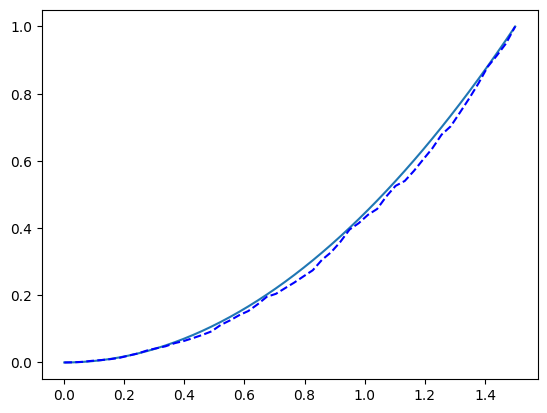

In [50]:
plt.figure()
#plt.plot(CoH, wave.rayleigh_cdf(hs*CoH, hs)**waves_per_state, '-k')
plt.plot(CoH, (CoH**2)/1.5**2)
plt.plot(CoH, imp_s, '--b')
plt.show()